# ** **Classification using scitlearn **

This noteBook cover the following concepts

---


1.Visualization of Data

2.Preprocessing of Data

3.Model Fitting using Scikit Learn

4.Model Evaluation

5.Result Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings (e.g., FutureWarnings, DeprecationWarnings etc.)
warnings.filterwarnings('ignore')

# Set default figure size for plots
plt.rcParams['figure.figsize'] = [10, 5]


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_2025/Traffic_Accident_prediction/dataset_traffic_accident_prediction1.csv')

In [5]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [6]:
df.shape

(840, 14)

# **# -------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------**

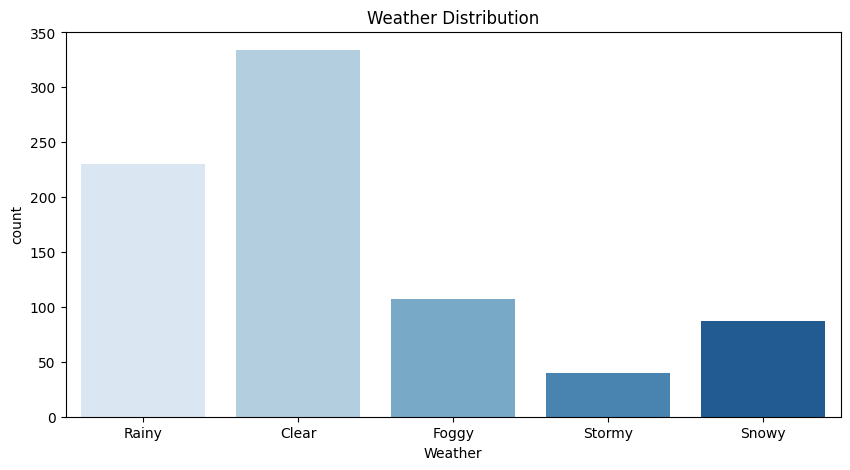

In [7]:


# 1. Distribution of categorical features
sns.countplot(x='Weather', data=df, palette='Blues')
plt.title("Weather Distribution")
plt.show()

# Chart Description
X-Axis: Shows the categories of weather: Rainy, Clear, Foggy, Stormy, and Snowy.

Y-Axis: Represents the count or number of times each weather condition occurred in the dataset.

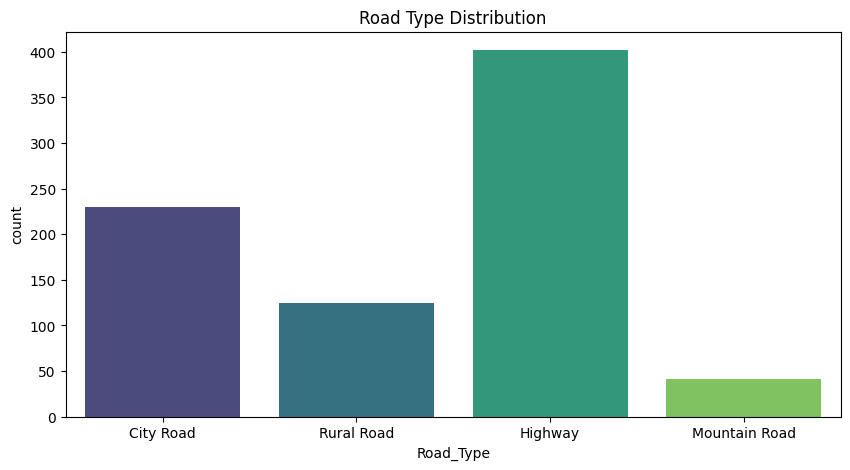

In [8]:
sns.countplot(x='Road_Type', data=df, palette='viridis')
plt.title("Road Type Distribution")
plt.show()

# Chart Description
The horizontal axis (x-axis) lists the different categories of roads: City Road, Rural Road, Highway, and Mountain Road.

The vertical axis (y-axis) represents the count, indicating how many times each type of road appears in the data.

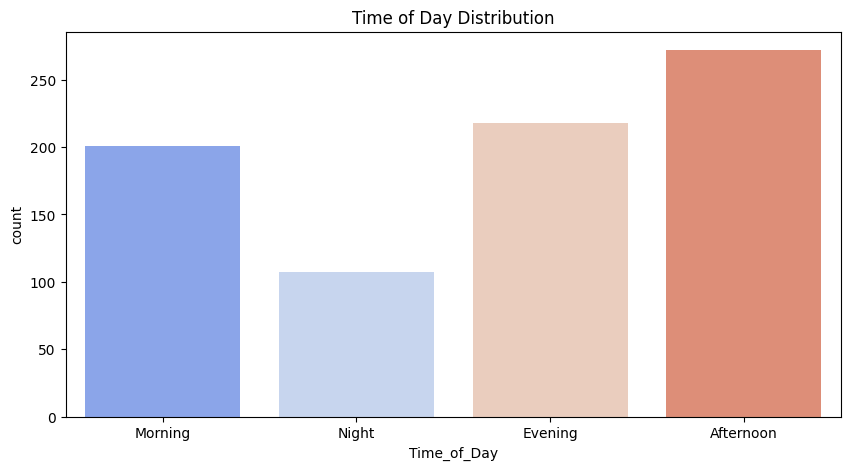

In [9]:
sns.countplot(x='Time_of_Day', data=df, palette='coolwarm')
plt.title("Time of Day Distribution")
plt.show()

# Chart Breakdown
The x-axis shows the four categories: Morning, Night, Evening, and Afternoon.

The y-axis represents the count, which is the number of times each category was recorded.

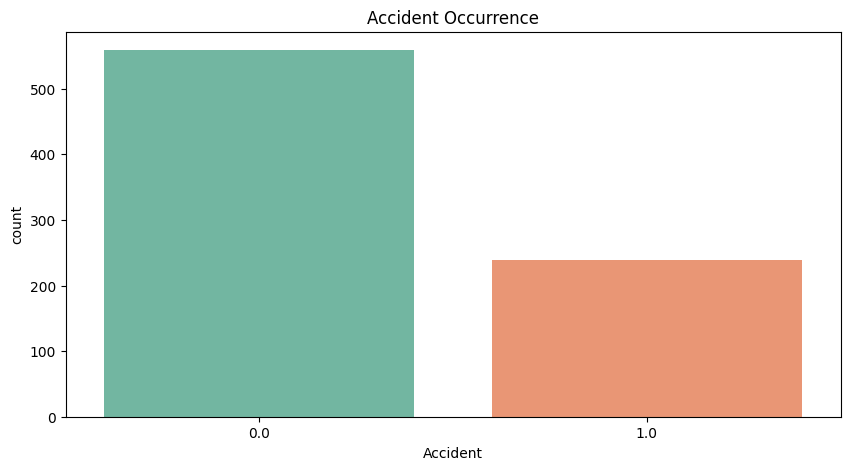

In [10]:
sns.countplot(x='Accident', data=df, palette='Set2')
plt.title("Accident Occurrence")
plt.show()

# Chart Analysis
The horizontal axis (x-axis) shows two categories, labeled 0.0 and 1.0. In a dataset like this, these values usually represent the absence or presence of an event.

0.0 likely indicates "No Accident".

1.0 likely indicates "Accident".

The vertical axis (y-axis) is the "count," representing how many times each value (0.0 or 1.0) appears in the dataset.

# **Distribution of numerical features**

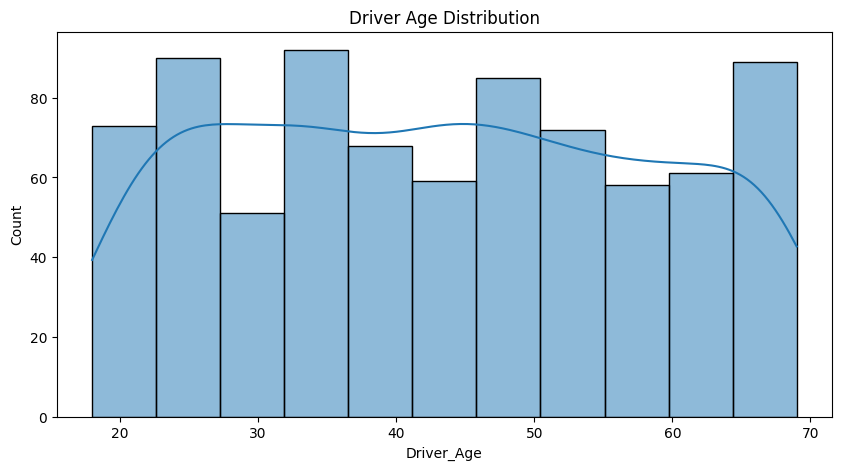

In [11]:
# 2. Distribution of numerical features
sns.histplot(df['Driver_Age'], kde=True)
plt.title("Driver Age Distribution")
plt.show()

# Chart Analysis
The x-axis represents the Driver_Age, ranging from approximately 15 to 70.

The y-axis shows the count, or the number of drivers that fall into each age range.

Key Insights
The chart shows that the ages are distributed across the entire range, from young drivers to older ones.

The highest number of drivers falls into the 20-25 and 35-40 age groups, with a count close to 90. The 65-70 age group also has a high count.

The lowest number of drivers is in the 30-35 age range, with a count of around 50.

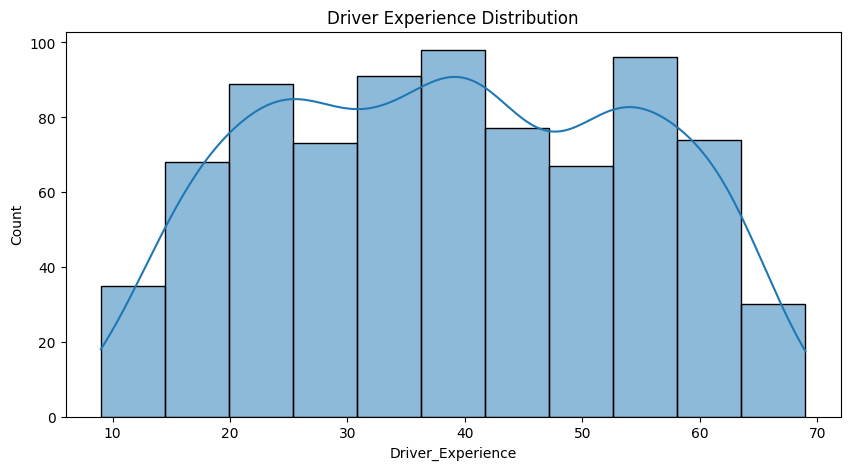

In [12]:
sns.histplot(df['Driver_Experience'], kde=True)
plt.title("Driver Experience Distribution")
plt.show()

# Chart Breakdown
The horizontal axis (x-axis) represents Driver_Experience, likely in years, ranging from approximately 5 to 70.

The vertical axis (y-axis) is the count, indicating the number of drivers that fall into each experience level bin.

Key Insights
The chart shows a wide range of experience levels among drivers.

There are three main peaks in the distribution:

The first peak is around 20-25 years of experience, with a count close to 90.

The second and highest peak is around 35-40 years of experience, with a count of nearly 100.

The third peak is around 50-55 years of experience, with a count of about 95.

The lowest counts are seen at the extremes: drivers with less than 15 years of experience and those with over 65 years. The count for both these groups is less than 50.

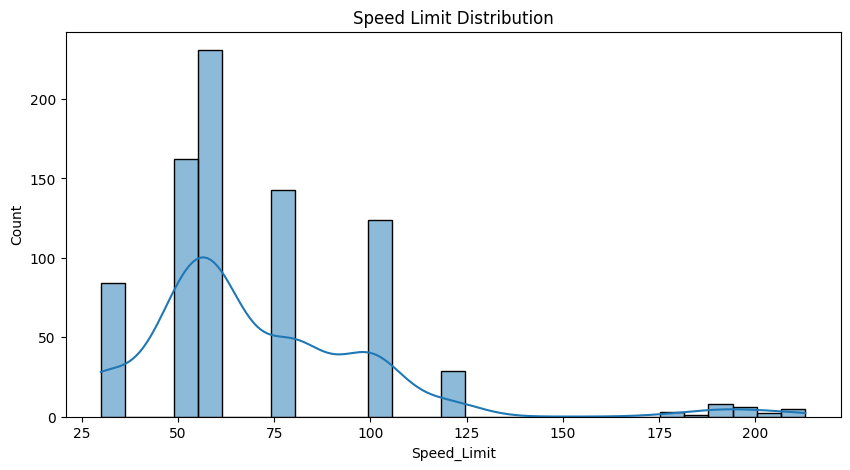

In [13]:
sns.histplot(df['Speed_Limit'], kde=True)
plt.title("Speed Limit Distribution")
plt.show()

# Chart Breakdown
The x-axis represents the speed limit in some unit (e.g., mph or km/h).

The y-axis shows the count, which is the number of times each speed limit was recorded.

The blue line overlaid on the bars is the Kernel Density Estimate (KDE), which gives a smooth approximation of the data's distribution.

**Key Insights**

The chart reveals a multi-modal distribution, meaning there are several common speed limits, not just one.

50 and 75 are the most common speed limits, with the tallest bars and the highest peaks in the KDE curve.

Speed limits around 100 are also quite common, while speeds below 30 are less frequent.

There are very few instances of speed limits between 125 and 175.

A small number of very high speed limits, ranging from about 180 to 210, are also present in the data.

This distribution is not a typical bell curve. Instead, it suggests that the data may come from different types of roads (e.g., city, rural, highway) where different speed limits are standard.

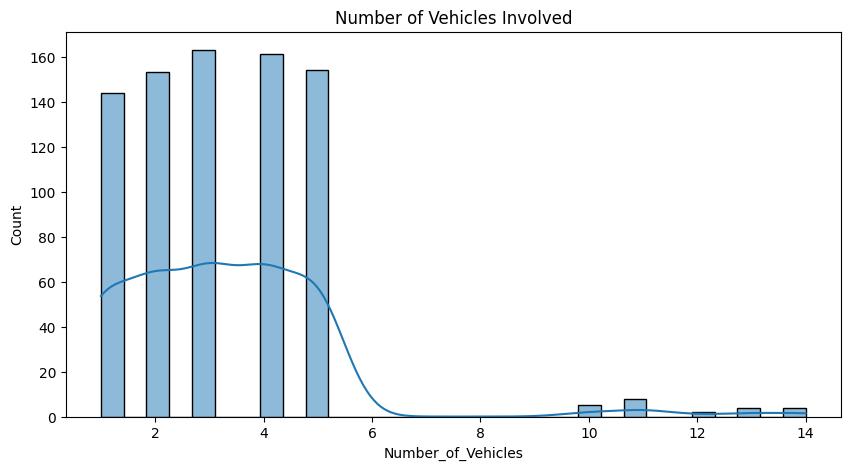

In [14]:
sns.histplot(df['Number_of_Vehicles'], kde=True)
plt.title("Number of Vehicles Involved")
plt.show()

# Chart Breakdown
The x-axis represents the Number_of_Vehicles involved, ranging from 1 to about 14.

The y-axis shows the count, which is the number of occurrences for each vehicle count.

# Key Insights
The vast majority of incidents involve a small number of vehicles, specifically between 1 and 5.

The most frequent number of vehicles involved appears to be 3, with a count of over 160. Incidents with 2 and 4 vehicles are also very common.

There's a sharp decline in the number of incidents involving more than 5 vehicles. The number of incidents drops dramatically to near zero after 5.

The counts for incidents with 10 or more vehicles are very low, suggesting these are extremely rare events in this dataset.

# **Relation plots**

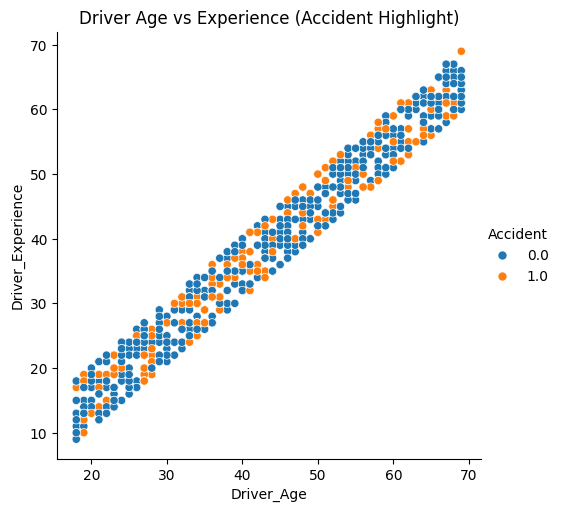

In [15]:
# 3. Relation plots
sns.relplot(x='Driver_Age', y='Driver_Experience', hue='Accident', data=df)
plt.title("Driver Age vs Experience (Accident Highlight)")
plt.show()

# Chart Breakdown
The x-axis represents Driver_Age in years.

The y-axis represents Driver_Experience in years.

Each dot on the plot represents a single data point (a driver).

The dots are color-coded based on the "Accident" variable:

Blue dots (0.0): Indicate that an accident did not occur.

Orange dots (1.0): Indicate that an accident did occur.

**Key Insights**

Strong Positive Correlation: The most obvious pattern is the strong, straight-line relationship between age and experience. As a driver's age increases, their driving experience also increases. This is an expected relationship in a dataset.

Accident Distribution: The orange dots (accidents) are scattered throughout the entire line. This indicates that accidents occur across all age and experience levels—there isn't one specific group that has a disproportionately high number of accidents based on this plot alone. Both older, more experienced drivers and younger, less experienced drivers have had accidents.

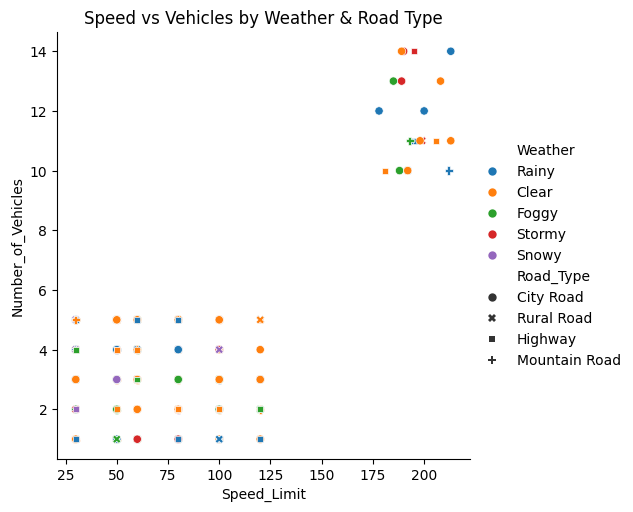

In [16]:
sns.relplot(x='Speed_Limit', y='Number_of_Vehicles', hue='Weather', style='Road_Type', data=df)
plt.title("Speed vs Vehicles by Weather & Road Type")
plt.show()


# Chart Breakdown
The x-axis represents the Speed_Limit.

The y-axis represents the Number_of_Vehicles involved.

The color (hue) of each marker indicates the Weather condition.

The shape (style) of each marker indicates the Road_Type.

**Key Insights**

Speed Limit vs. Number of Vehicles: There is a clear pattern where the number of vehicles involved is generally low (less than 6) at lower speed limits (25-100). The only time the number of vehicles goes up significantly (to 10 or more) is at very high speed limits (above 175). This suggests that high-speed collisions tend to involve more vehicles.

Weather and Speed Limit: All types of weather—Rainy, Clear, Foggy, Stormy, and Snowy—are present across the lower speed limits. At the higher speed limits, however, incidents only seem to occur during Rainy, Clear, and Stormy weather, with no incidents during Foggy or Snowy conditions.

Road Type and Speed Limit:

City Road (circles) and Rural Road (X) incidents are primarily concentrated at lower speed limits (25-100).

Highway (squares) incidents occur at both low and very high speed limits.

Mountain Road (plus signs) incidents are only found at low speed limits (below 100), except for one incident at a very high speed limit.

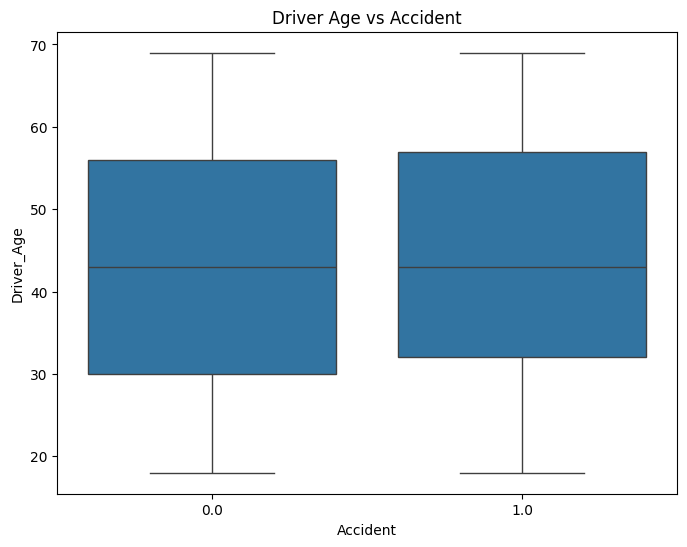

In [17]:
# 4. Box & Violin plots
plt.figure(figsize=(8,6))
sns.boxplot(x='Accident', y='Driver_Age', data=df)
plt.title("Driver Age vs Accident")
plt.show()

# Chart Interpretation
A box plot provides a visual summary of a dataset's distribution through five key numbers: the minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

X-axis: The categories are '0.0' (no accident) and '1.0' (accident).

Y-axis: The 'Driver_Age' is shown in years.

By comparing the two boxes, we can see if there is a difference in the age distribution between the two groups. In this plot:

The median line (the line inside the box) for both groups is roughly the same, at about 42 years.

The box itself (which represents the middle 50% of the data, from Q1 to Q3) is almost identical for both groups.

The whiskers (the lines extending from the box, which show the range of the data) also appear to be very similar.

**Conclusion**

Based on this box plot, there is no significant difference in age distribution between drivers who had an accident and those who did not. The median age, the spread of the middle 50% of ages, and the overall range of ages are all very similar for both groups. This suggests that driver age, by itself, is not a strong predictor of accident occurrence in this dataset.

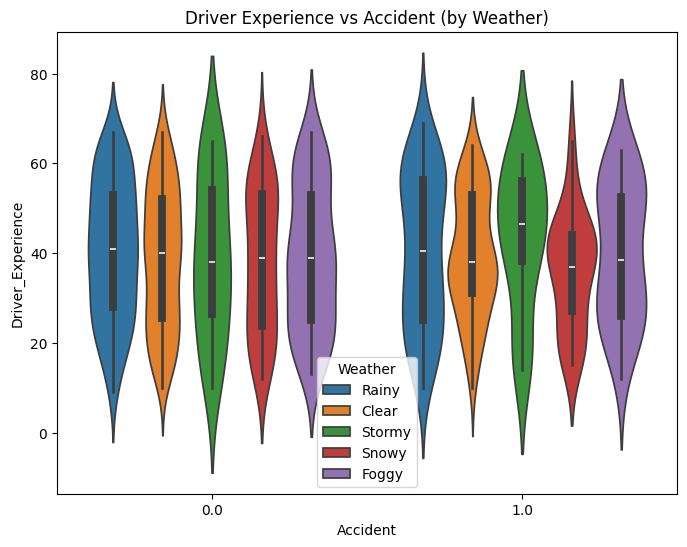

In [18]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Accident', y='Driver_Experience', hue='Weather', data=df)
plt.title("Driver Experience vs Accident (by Weather)")
plt.show()

# Chart Breakdown
The x-axis is the "Accident" category: '0.0' for no accident and '1.0' for an accident.

The y-axis is "Driver_Experience," likely in years.

Each violin shape represents a Kernel Density Estimate (KDE), showing the distribution of data for that specific group. A wider section of the violin means more data points are concentrated at that experience level.

Inside each violin is a small box plot, with a white dot for the median, a thick black bar for the interquartile range (IQR), and thin lines for the whiskers.

The color of each violin corresponds to a specific Weather condition, as shown in the legend.

**Key Insights**

**Overall Similarity:** When you compare the '0.0' (no accident) and '1.0' (accident) groups, the overall shapes of the violins are quite similar across all weather types. This suggests that the distribution of driver experience for those who have accidents is not significantly different from those who don't.

**No Single Predictive Factor**: The plot indicates that neither driver experience alone nor weather alone seems to be a dominant factor in predicting accidents. Accidents occur across all levels of experience, and under all weather conditions.

**Density Peaks**: Most of the distributions are widest in the middle, around 40-50 years of experience, and also have a smaller peak at lower experience levels. This is consistent with the earlier histogram of driver experience.

**Visual Comparison**: The violin plot is especially useful here because it reveals the underlying data distribution more clearly than a simple box plot. For example, you can see that for both accident groups and non-accident groups, there are concentrations of drivers with lower experience, as well as a large concentration of drivers with moderate to high experience.

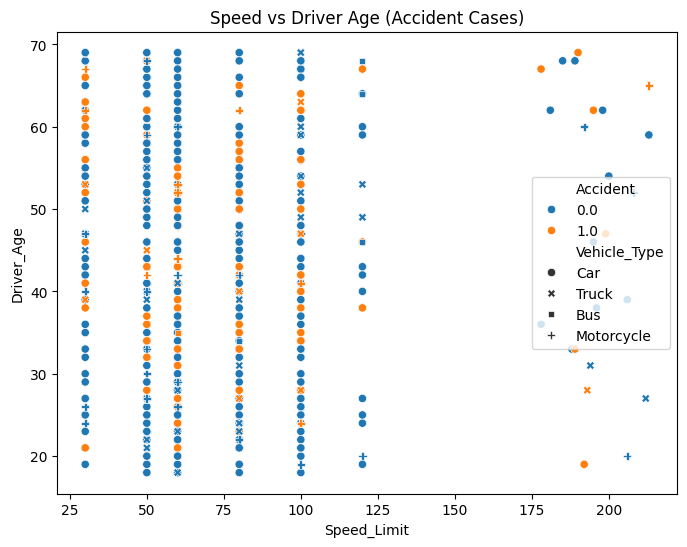

In [19]:
# 5. Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Speed_Limit', y='Driver_Age', hue='Accident', style='Vehicle_Type', data=df)
plt.title("Speed vs Driver Age (Accident Cases)")
plt.show()

# Chart Breakdown
The x-axis represents Speed_Limit. The data is grouped into distinct speed limit values (e.g., 25, 50, 75, 100, 125, and some higher values).

The y-axis represents Driver_Age.

The color (hue) of each marker indicates the Accident status:

Blue dots (0.0): No accident occurred.

Orange dots (1.0): An accident did occur.

The shape (style) of each marker indicates the Vehicle_Type:

Circle: Car

X: Truck

Square: Bus

Plus sign (+): Motorcycle

**Key Insights**

Accidents Across All Ages and Speeds: Accidents (orange dots) are not confined to a single speed limit or age group. They are scattered across all presented speed limits and a wide range of driver ages. This suggests that neither speed limit nor driver age alone is a definitive predictor of an accident.

**Data Density**: Most of the data points are clustered around lower speed limits (25, 50, 75, and 100), with a wide range of ages represented in each cluster. This implies that most incidents or events recorded in the dataset happened on roads with these speed limits.

**High-Speed Incidents:** At very high speed limits (above 175), the number of data points is much lower. However, a higher proportion of these seem to be accident cases (orange dots).

**Vehicle Types:** All vehicle types appear to be present across the lower speed limits. The few high-speed incidents (above 175) include cars, trucks, and motorcycles. There are no buses represented in the high-speed data points shown.

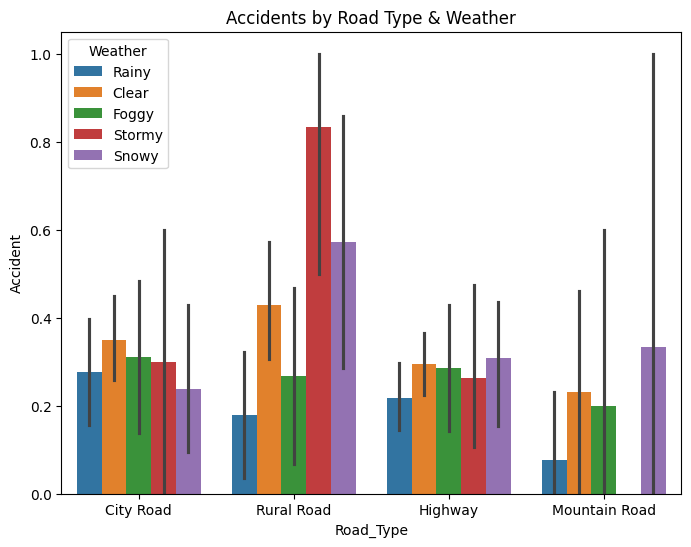

In [20]:
# 6. Barplot
plt.figure(figsize=(8,6))
sns.barplot(x='Road_Type', y='Accident', hue='Weather', data=df)
plt.title("Accidents by Road Type & Weather")
plt.show()

#
This image shows a grouped bar chart titled "Accidents by Road Type & Weather." It displays the average number of accidents (Accident in the code is likely a binary variable 0/1, so the average represents the proportion or probability of an accident) for different road types, with each bar colored by the weather condition. The vertical black lines are error bars, representing the variability or uncertainty in the data.

**Key Insights**

**Accident Risk Varies by Road and Weather:** The chart demonstrates that the likelihood of an accident is not the same for all road types or weather conditions.

**Rural Roads are Risky:** The bars for Rural Roads are noticeably taller than for any other road type, indicating a higher proportion of accidents. This is particularly true during Stormy weather, where the proportion of accidents is the highest across the entire chart.

**Lower Risk on Highways and Mountain Roads:** The proportion of accidents on Highways and Mountain Roads is generally lower than on Rural Roads.

**Weather's Impact:**

Foggy and Stormy weather generally have a higher proportion of accidents on most road types.

Rainy and Clear weather seem to have a lower proportion of accidents.

**Impact of Error Bars:** The large error bars, especially for Rural Road and Mountain Road accidents in Stormy and Snowy weather, suggest that there is a lot of variability in the data for these specific conditions. This could be due to a smaller sample size, meaning these incidents are less common, making the average less stable. This is an important point for a data scientist, as it indicates that while the proportions seem high, the estimate is less certain.

# **2.Preprocessing of Data**

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_2025/Traffic_Accident_prediction/dataset_traffic_accident_prediction1.csv')
print('data uploaded successfully')

data uploaded successfully


In [7]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [9]:
df.shape

(840, 14)

In [10]:
df.isnull().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


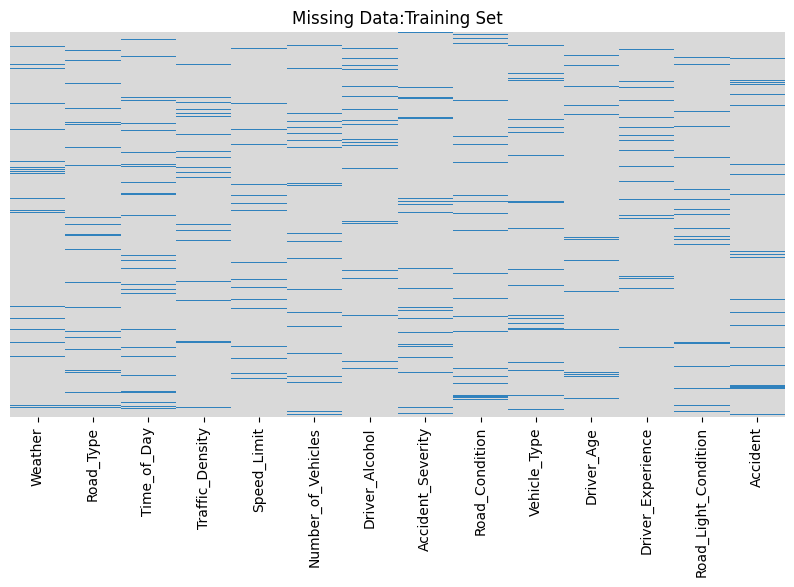

In [11]:
# heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap = 'tab20c_r')
plt.title('Missing Data:Training Set')
plt.show()

In [12]:
# Remove rows with missing values
df.dropna(inplace=True)

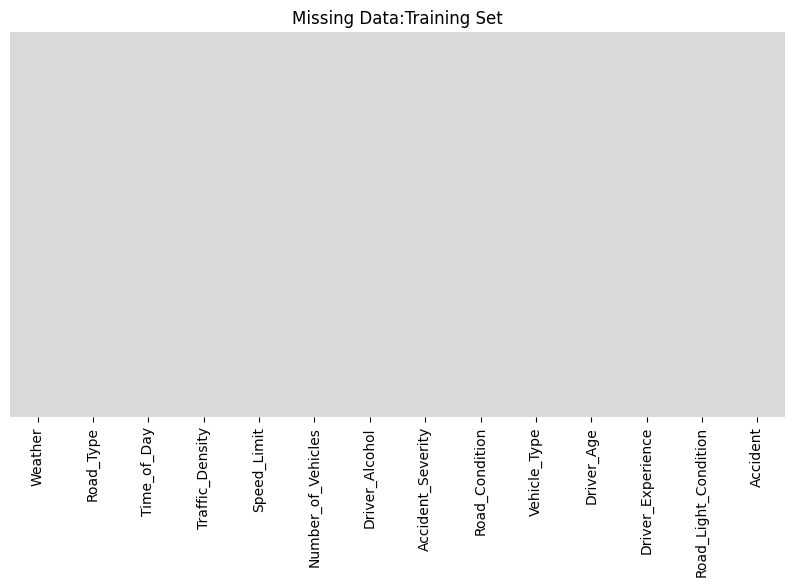

In [13]:
# heatmap
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap = 'tab20c_r')
plt.title('Missing Data:Training Set')
plt.show() # Now Removed all missing values

In [14]:
# Remove Accident_Saverity feature
df.drop('Accident_Severity',axis=1,inplace=True)

In [15]:
df.shape

(405, 13)

In [16]:
df.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Dry,Car,62.0,55.0,Artificial Light,1.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Dry,Car,29.0,22.0,Artificial Light,1.0


# **Label Encoder**

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# Columns you want to encode
cols_to_encode = ['Weather', 'Road_Type', 'Vehicle_Type','Time_of_Day',
                  'Road_Condition','Vehicle_Type','Road_Light_Condition']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each column
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])



In [19]:
df.head(3)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,2,1,1,1.0,60.0,4.0,0.0,1,1,54.0,52.0,0,0.0
3,0,0,0,2.0,60.0,3.0,0.0,2,0,34.0,31.0,1,0.0
4,2,1,2,1.0,195.0,11.0,0.0,0,1,62.0,55.0,0,1.0


# **Scaling(Standard_Scalling)**

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
df[['Speed_Limit','Driver_Age','Driver_Experience']] = sc.fit_transform(df[['Speed_Limit','Driver_Age','Driver_Experience']])
# df[['Speed_Limit','Driver_Age','Driver_Experience']].head()

In [48]:
# # Histogram + KDE
# plt.figure(figsize=(12,6))
# for i, col in enumerate(df.columns, 1):
#     plt.subplot(1, 3, i)
#     sns.histplot(df[col], bins=30, kde=True)  # kde=True for smooth curve
#     plt.title(f"Distribution of {col}")

# plt.tight_layout()
# plt.show()

In [23]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,2,1,1,1.0,-0.328619,4.0,0.0,1,1,0.668949,0.828609,0,0.0
3,0,0,0,2.0,-0.328619,3.0,0.0,2,0,-0.649738,-0.537415,1,0.0
4,2,1,2,1.0,3.887067,11.0,0.0,0,1,1.196424,1.023755,0,1.0
6,1,1,0,0.0,-0.328619,4.0,0.0,0,3,-1.111279,-0.862659,1,1.0
7,2,0,0,0.0,-0.328619,4.0,0.0,0,1,-0.979410,-1.122854,0,1.0


# **3.Model Fitting using Scikit Learn**

# Objedtive: Machine Learning
Now all the data is numerice

Now train data is perfect for machine learning

# **Target Variable spliting**

we will split the full dataset into Input and target variables

In [24]:
# create matrix of feature
x = df.drop('Accident',axis=1) # grab everything else but 'sruvived'

In [26]:
# create target variable
y = df['Accident'] # y is the column we are trying to predict

# **split the Training and Testing dataset**

In [27]:
# use x and y variables to split the training data into and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(324, 12)
(324,)
(81, 12)
(81,)


# **Model Training**

Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# create instance of model
log_reg = LogisticRegression()

# pass training data into model
log_reg.fit(x_train,y_train)


Logistic Regression


LogisticRegression()

# **Model Evaluation**

In [47]:
from sklearn.metrics import accuracy_score
# prediction from model
y_pred_log_reg = log_reg.predict(x_test)

print('Logistic Regression')
print('-----'*30)
log_reg_accuracy = round(accuracy_score(y_test,y_pred_log_reg) *100,2)
print('Accuracy: ',log_reg_accuracy,'%')


Logistic Regression
------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy:  69.14 %


# **2.Decision Tree**

In [48]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# create instance of model
Dtree = DecisionTreeClassifier()

# pass training data into model
Dtree.fit(x_train,y_train)

Decision Tree Classifier


DecisionTreeClassifier()

# **Model Evaluation**

In [52]:
from sklearn.metrics import accuracy_score
# Prediction from model

y_pred_Dtree = Dtree.predict(x_test)
print('Decision Tree')
print('-----'*30)
Dtree_accuracy = round(accuracy_score(y_test,y_pred_Dtree) *100,2)
print('Accuracy: ',Dtree_accuracy,'%')

Decision Tree
------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy:  56.79 %


# **3.Random Forest**

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

print('Random Forest Classifier')

# pass training data into modle
rfc.fit(x_train,y_train)

Random Forest Classifier


RandomForestClassifier()

# **Model Evaluation**

In [54]:
from os import access
from sklearn.metrics import accuracy_score

# prediction from the model
y_pred_rfc = rfc.predict(x_test)


print('Random Forest Classifier')
# accuracy
print('----'*30)
rfc_accuracy = round(accuracy_score(y_test,y_pred_rfc) *100,2)
print('Accuracy: ',rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------------------------------------------------------------------
Accuracy:  72.84 %


# **4.Gradient Boosting Classifier**

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# create instance
gbc = GradientBoostingClassifier()

# pass training data into model
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

# **Model Evaluation**

In [56]:
from sklearn.metrics import accuracy_score

y_pred_gbc = gbc.predict(x_test)

print('----'*30)

gbc_accuracy = round(accuracy_score(y_test,y_pred_gbc) *100,2)
print('Accuracy: ',gbc_accuracy,'%')

------------------------------------------------------------------------------------------------------------------------
Accuracy:  69.14 %


In [57]:
# sample model scores (replace these with your actual model scores)
model_scores = {
    'Logistic Regression': log_reg_accuracy,
    'Decision Tree Classifier': Dtree_accuracy,
    'Random Forest Classifier': rfc_accuracy,
    'Gradient Boostion Classifier': gbc_accuracy
}

In [58]:
# sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(),key=lambda x: x[1],reverse=True)

# Display the ranking of the model
print('Model Rankings (Greater values are better):')
for rank, (model_name, score) in enumerate(sorted_scores,start=1):
  print(f'{rank}. {model_name}: {score}')

Model Rankings (Greater values are better):
1. Random Forest Classifier: 72.84
2. Logistic Regression: 69.14
3. Gradient Boostion Classifier: 69.14
4. Decision Tree Classifier: 56.79
